In [1]:
import torch
import torch.nn as nn
import pylab as plt
from sklearn import datasets
from dal_toolbox.models import deterministic

/home/denis/miniconda3/envs/uncertainty_evaluation/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


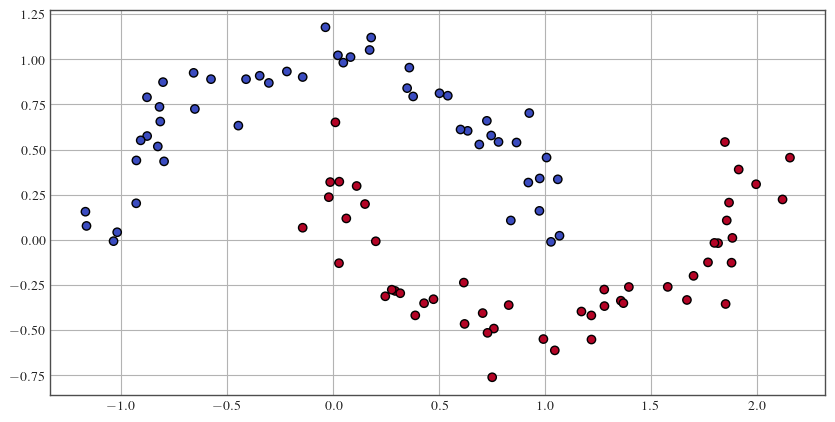

In [2]:
X, y = datasets.make_moons(noise=.1, random_state=1)


X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()

train_ds = torch.utils.data.TensorDataset(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
from dal_toolbox.models.deterministic.trainer import BasicTrainer

train_loader = torch.utils.data.DataLoader(train_ds)
model = nn.Sequential(nn.Linear(2, 50), nn.ReLU(), nn.Linear(50, 2))
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, weight_decay=.00)
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)
criterion = torch.nn.CrossEntropyLoss()

trainer = BasicTrainer(
    model=model, 
    optimizer=optimizer,
    train_one_epoch=deterministic.train.train_one_epoch,
    evaluate=deterministic.evaluate.evaluate,
    criterion=criterion,
    lr_scheduler=lr_scheduler,
    device='cuda'
)

trainer.train(n_epochs=100, train_loader=train_loader)
trainer.evaluate(train_loader)

Epoch [1] [  0/100] eta: 0:00:30 lr: 0.01 loss: 0.9591 (0.9591) acc1: 0.0000 (0.0000) time: 0.3003 data: 0.0003 max mem: 0
Epoch [1] Total time: 0:00:00
Epoch [2] [  0/100] eta: 0:00:00 lr: 0.009997532801828659 loss: 0.1877 (0.1877) acc1: 100.0000 (100.0000) time: 0.0007 data: 0.0001 max mem: 0
Epoch [2] Total time: 0:00:00
Epoch [3] [  0/100] eta: 0:00:00 lr: 0.00999013364214136 loss: 0.0915 (0.0915) acc1: 100.0000 (100.0000) time: 0.0007 data: 0.0001 max mem: 0
Epoch [3] Total time: 0:00:00
Epoch [4] [  0/100] eta: 0:00:00 lr: 0.009977809823015401 loss: 0.0861 (0.0861) acc1: 100.0000 (100.0000) time: 0.0008 data: 0.0001 max mem: 0
Epoch [4] Total time: 0:00:00
Epoch [5] [  0/100] eta: 0:00:00 lr: 0.009960573506572392 loss: 0.0787 (0.0787) acc1: 100.0000 (100.0000) time: 0.0006 data: 0.0001 max mem: 0
Epoch [5] Total time: 0:00:00
Epoch [6] [  0/100] eta: 0:00:00 lr: 0.00993844170297569 loss: 0.0804 (0.0804) acc1: 100.0000 (100.0000) time: 0.0009 data: 0.0001 max mem: 0
Epoch [6] Tota

{'test_acc1': 100.0,
 'test_prec': 1.0,
 'test_loss': 0.00554594537243247,
 'test_nll': 0.00554594537243247,
 'test_tce': 0.005396160762757063,
 'test_mce': 0.013943536207079887}

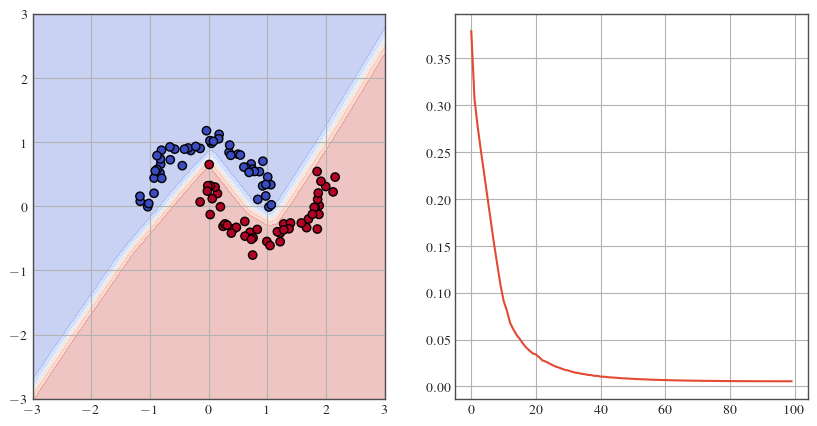

In [6]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
xx, yy = torch.meshgrid(torch.linspace(-3, 3, 101), torch.linspace(-3, 3, 101))
zz = torch.stack([xx.flatten(), yy.flatten()], dim=-1)
model.to('cpu')
with torch.no_grad():
    probas = model(zz).softmax(-1)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(xx, yy, probas[:, 1].view(xx.shape), alpha=.3, zorder=0)

plt.subplot(122)
plt.plot([d['train_loss'] for d in trainer.train_history])

plt.show()